### 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。

### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。

### 【問題3】推定
推定する仕組みを実装してください。

### 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

### 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。

→下記プログラムをご確認ください。

In [72]:
#importとデータファイルの読込

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

#train, testデータの読み込み
df = pd.read_csv("train.csv")
X = df.loc[:,["GrLivArea", "YearBuilt"]].values
y = df.loc[:,["SalePrice"]].values

#train, testデータへの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
scaler.fit(y_train.reshape(-1,1))
y_train_transformed = scaler.transform(y_train.reshape(-1,1))
y_test_transformed = scaler.transform(y_test.reshape(-1,1))

In [78]:
class ScratchLinearRegression():
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        # 精度を記録する配列を用意
        self.mse = np.zeros(self.iter)
        self.val_mse = np.zeros(self.iter)
        #機械学習にて求めるパラメータを記録
        self.theta = 0
        
    def fit(self, X, y, X_val=None, y_val=None):        
        #最急降下法
        self._gradient_descent(X, y, X_val, y_val)
        
    #予測値の出力
    def predict(self, X):
        y_hat = self._linear_hypothesis(X)
        return y_hat

    #最急降下法
    def _gradient_descent(self, X, y, X_val=None, y_val=None ):
        #説明変数のサイズを確認
        param_length = X.shape
        n_samples = param_length[0]
        n_features = param_length[1]
        
        #θの初期値を設定
        np.random.seed(0)
        self.theta = np.random.rand(n_features) 
        self.theta = self.theta.reshape(1,-1)
        #print(self.theta)

        #最急降下法の実装（損失・精度もイテレーション毎に記録する。）
        for i in range(self.iter): 
            y_hat = self._linear_hypothesis(X)
            self.loss[i] = self._loss_function(y_hat, y)

            if self.verbose:
                y_hat_test = self._linear_hypothesis(X_val)
                self.val_loss[i] = self._loss_function(y_hat_test, y_val)
                
            self.theta = self.theta - self.lr / n_samples * np.sum ((y_hat -  y) * X, axis=0)
     
    #仮定関数の作成
    def _linear_hypothesis(self, X):
        y_hat = X @ self.theta.T
        return y_hat
    
    #損失関数の作成
    def _loss_function(self, y_pred, y):
        loss_func = (1/2)*np.mean((y_pred - y)**2)
        return loss_func       

#平均二乗誤差の算出
def MSE(y_pred, y):    
    mse = np.mean((y_pred - y)**2)
    return mse

#機械学習パラメータの設定
alpha = 1e-5
num_iter = int(3e+5)

#機械学習(fit)
#slr = ScratchLinearRegression(num_iter, alpha, True, False)
#slr.fit(X_train_transformed, y_train_transformed)


### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

→下記の通りスクラッチによる線形回帰でもimportと同等のMSEとなった。（今回はスクラッチの方が値が小さい）

In [61]:
#機械学習による予測
y_pred = slr.predict(X_test_transformed)
mse = MSE(y_pred, y_test_transformed)
print("Scratch_MSE: ",mse)

#importした線形回帰による機械学習、予測
y_train_transformed = y_train_transformed.reshape(-1,1)
lr = SGDRegressor(max_iter=num_iter, alpha=alpha)
lr.fit(X_train_transformed, y_train_transformed)

y_pred_import = lr.predict(X_test_transformed)
mse_import = MSE(y_pred_import, y_test_transformed)
print("Import_MSE: ",mse_import)

Scratch_MSE:  0.3748453686071031
Import_MSE:  2.019874566484287


/Users/tomohisamatsuda/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

→ある程度の回数を重ねるとlossの降下が飽和しており、適切なグラフと考えます。

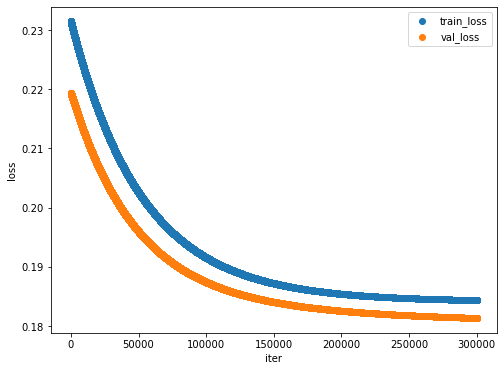

In [75]:
#機械学習(fit, 検証データ機能付き)
slr = ScratchLinearRegression(num_iter, alpha, True, True)
slr.fit(X_train_transformed, y_train_transformed, X_test_transformed, y_test_transformed)

#グラフ描画 
graph_num = range(slr.iter)
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(graph_num, slr.loss, label='train_loss')
plt.scatter(graph_num, slr.val_loss, label='val_loss')
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()
plt.show()